$$ \Huge Advertising $$
$$Minh ~ Kha$$

# Implement Linear Regression algorithm 

## Plot

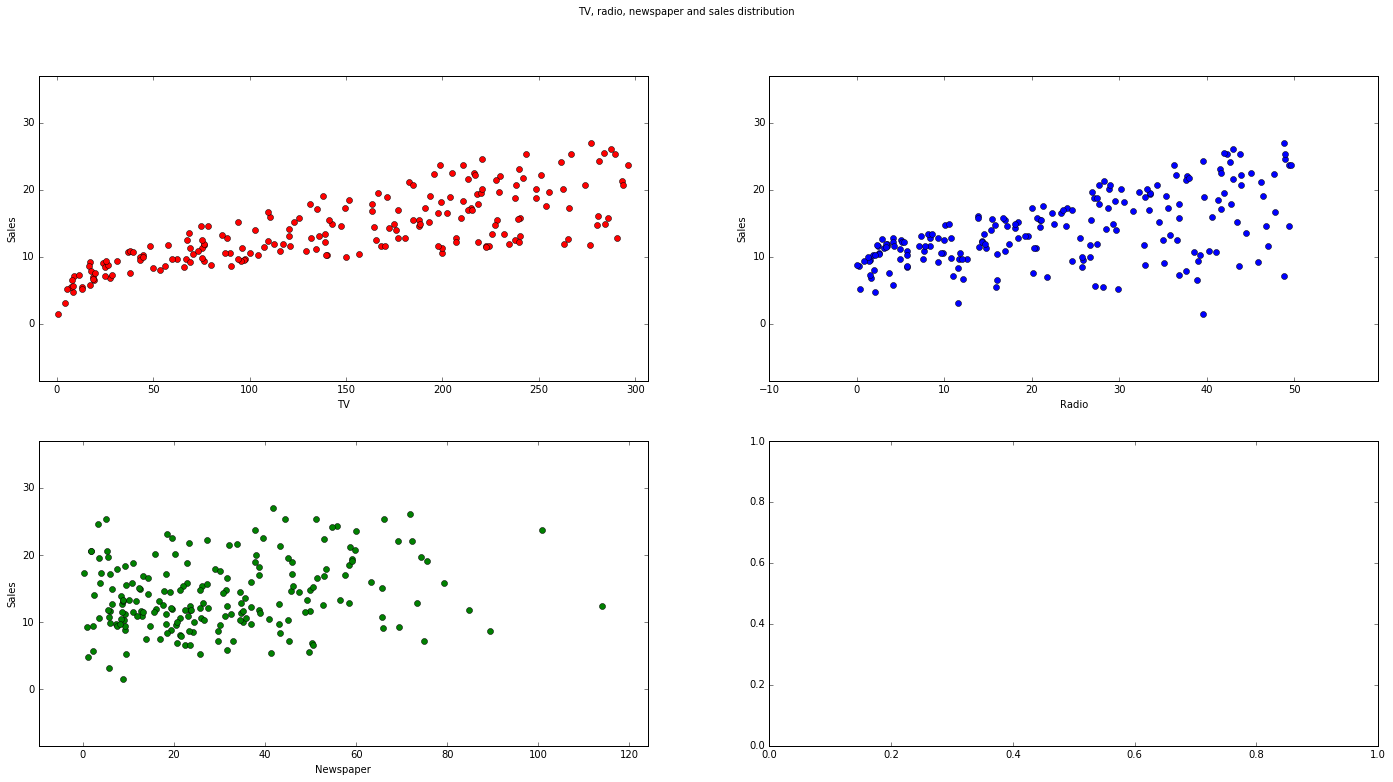

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

def parse_data_from_csv(csv_file_path):
    advertising_data = pd.read_csv(csv_file_path, delimiter=',')
    return (advertising_data.Id.values, advertising_data.TV.values, advertising_data.radio.values, \
           advertising_data.newspaper.values, advertising_data.sales.values)

def plot(X, Y, axis, label=None, figsize=(12, 8), color='ro'):
    
    plt.figure(figsize=figsize)
    
    X = np.array(X).T
    Y = np.array(Y).T
    
    plt.plot(X, Y, color)
    plt.axis(axis)
    plt.xlabel(label)
    plt.ylabel(label)
    plt.show()

advertising_data = pd.read_csv('Advertising.csv', delimiter=',')

id = advertising_data.Id.values
tv = advertising_data.TV.values
radio = advertising_data.radio.values
newspaper = advertising_data.newspaper.values

sales = advertising_data.sales.values

fig, axes = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(24)
fig.suptitle('TV, radio, newspaper and sales distribution')

Y = sales.T

ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[1, 0]

# TV ~ Sales
ax1.plot(tv.T, Y, 'ro')
ax1.axis([np.min(tv.T)-10, np.amax(tv.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax1.set(xlabel='TV', ylabel='Sales')

# Radio ~ Sales
ax2.plot(radio.T, Y, 'bo')
ax2.axis([np.min(radio.T)-10, np.amax(radio.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax2.set(xlabel='Radio', ylabel='Sales')

# Newspapers ~ Sales
ax3.plot(newspaper.T, Y, 'go')
ax3.axis([np.min(newspaper.T)-10, np.amax(newspaper.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax3.set(xlabel='Newspaper', ylabel='Sales')

plt.show()

## Fit

w_tv =  [[ 7.03259355]
 [ 0.04753664]]
w_radio =  [[ 9.3116381 ]
 [ 0.20249578]]
w_newspaper =  [[ 12.35140707]
 [  0.0546931 ]]
(1, 200)
(1, 200)


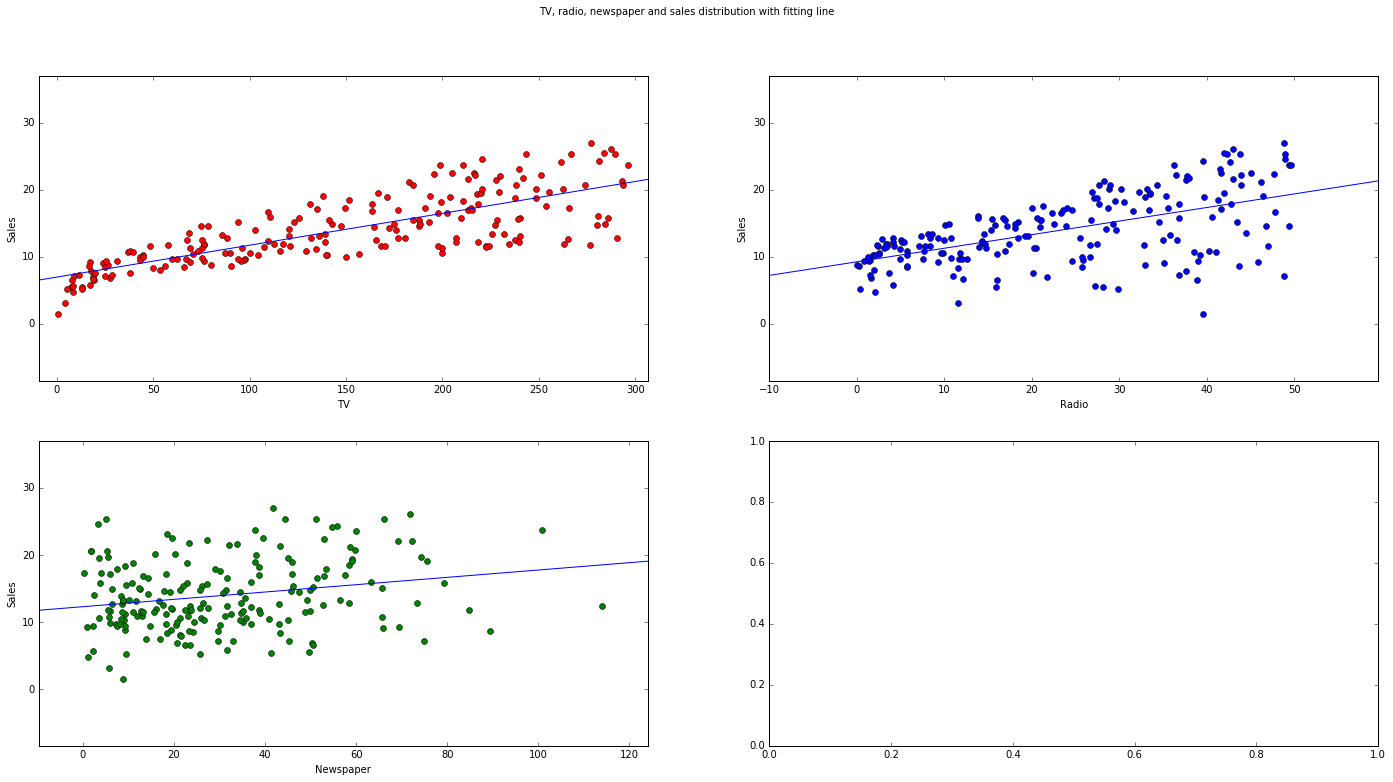

In [79]:
# Build xbar
one = np.ones((tv.shape[0], 1))
tv = np.reshape(tv, (tv.shape[0], 1))
radio = np.reshape(radio, (radio.shape[0], 1))
newspaper = np.reshape(newspaper, (newspaper.shape[0], 1))
Y = np.reshape(Y, (Y.shape[0], 1))

tv_bar = np.concatenate((one, tv), axis=1)
radio_bar = np.concatenate((one, radio), axis=1)
newspaper_bar = np.concatenate((one, newspaper), axis=1)

# Calculate weights of the fitting lines
A_tv = tv_bar.T @ tv_bar
w_tv = np.linalg.pinv(tv_bar.T @ tv_bar) @ (tv_bar.T @ Y)
w_radio = np.linalg.pinv(radio_bar.T @ radio_bar) @ (radio_bar.T @ Y)
w_newspaper = np.linalg.pinv(newspaper_bar.T @ newspaper_bar) @ (newspaper_bar.T @ Y)

print('w_tv = ', w_tv)
print('w_radio = ', w_radio)
print('w_newspaper = ', w_newspaper)

# Prepare the fitting line
x_tv = np.linspace(np.amin(tv)-10, np.amax(tv)+10, 2)
x_radio = np.linspace(np.amin(radio)-10, np.amax(radio)+10, 2)
x_newspaper = np.linspace(np.amin(newspaper)-10, np.amax(newspaper+10), 2)

y_tv = w_tv[0] + w_tv[1]*x_tv
y_radio = w_radio[0] + w_radio[1]*x_radio
y_newspaper = w_newspaper[0] + w_newspaper[1]*x_newspaper

# Draw the fitting line
fig, axes = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(24)
fig.suptitle('TV, radio, newspaper and sales distribution with fitting line')

ax1, ax2, ax3 = axes[0, 0], axes[0, 1], axes[1, 0]

print(tv.T.shape)
print(Y.T.shape)
# TV ~ Sales
ax1.plot(tv.T, Y.T, 'ro')
ax1.plot(x_tv, y_tv)
ax1.axis([np.min(tv.T)-10, np.amax(tv.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax1.set(xlabel='TV', ylabel='Sales')

# Radio ~ Sales
ax2.plot(radio.T, Y.T, 'bo')
ax2.plot(x_radio, y_radio)
ax2.axis([np.min(radio.T)-10, np.amax(radio.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax2.set(xlabel='Radio', ylabel='Sales')

# Newspapers ~ Sales
ax3.plot(newspaper.T, Y.T, 'go')
ax3.plot(x_newspaper, y_newspaper)
ax3.axis([np.min(newspaper.T)-10, np.amax(newspaper.T)+10, np.min(Y)-10, np.amax(Y)+10])
ax3.set(xlabel='Newspaper', ylabel='Sales')

plt.show()

## Predict

In [81]:
y_tv = w_tv[1]*tv[1][0] + w_tv[0]
y_radio = w_radio[1]*radio[1][0] + w_radio[0]
y_newspaper = w_radio[1]*newspaper[1][0] + w_radio[0]

print('Predicted sales with tv is: %.1f, real number: %.1f' %(y_tv, Y[1][0]))
print('Predicted radio with tv is: %.1f, real number: %.1f' %(y_radio, Y[1][0]))
print('Predicted newspaper with tv is: %.1f, real number: %.1f' %(y_newspaper, Y[1][0]))

Predicted sales with tv is: 9.1, real number: 10.4
Predicted radio with tv is: 17.3, real number: 10.4
Predicted newspaper with tv is: 18.4, real number: 10.4


# Predict with scikit-learn

In [84]:
from sklearn import datasets, linear_model

# fit the model by linear regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept=0 for calculating the bias
regr.fit(tv_bar, Y)

# Compare the results
print('Solution found by scikit-learn : ', regr.coef_)
print('Solution found by implemented code : ', w_tv.T)

Solution found by scikit-learn :  [[ 7.03259355  0.04753664]]
Solution found by implemented code :  [[ 7.03259355  0.04753664]]
